# **Dataset loading**

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ryandpark/fruit-quality-classification

Dataset URL: https://www.kaggle.com/datasets/ryandpark/fruit-quality-classification
License(s): CC0-1.0


In [ ]:
import zipfile
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
dataset_path = "fruit-quality-classification.zip"  # Ensure this matches the downloaded filename
extract_path = "fruit_quality_data"  # Folder to extract to

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
os.listdir(extract_path)

['Bad Quality_Fruits', 'Good Quality_Fruits', 'Mixed Qualit_Fruits']

In [ ]:
directories = [
    "fruit_quality_data/Bad Quality_Fruits/Apple_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Banana_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Guava_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Lime_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Orange_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Pomegranate_Bad",
    "fruit_quality_data/Good Quality_Fruits/Apple_Good",
    "fruit_quality_data/Good Quality_Fruits/Banana_Good",
    "fruit_quality_data/Good Quality_Fruits/Guava_Good",
    "fruit_quality_data/Good Quality_Fruits/Lime_Good",
    "fruit_quality_data/Good Quality_Fruits/Orange_Good",
    "fruit_quality_data/Good Quality_Fruits/Pomegranate_Good",
    "fruit_quality_data/Mixed Qualit_Fruits/Apple",
    "fruit_quality_data/Mixed Qualit_Fruits/Banana",
    "fruit_quality_data/Mixed Qualit_Fruits/Guava",
    "fruit_quality_data/Mixed Qualit_Fruits/Lemon",
    "fruit_quality_data/Mixed Qualit_Fruits/Orange",
    "fruit_quality_data/Mixed Qualit_Fruits/Pomegranate",
]

# Count and print the number of images in each directory
total=0
for directory in directories:
    if os.path.exists(directory):
        num_images = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
        print(f"Number of images in '{directory}': {num_images}")
        total+=num_images
    else:
        print(f"Directory '{directory}' does not exist.")
print(total)

Number of images in 'fruit_quality_data/Bad Quality_Fruits/Apple_Bad': 1141
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Banana_Bad': 1087
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Guava_Bad': 1129
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Lime_Bad': 1085
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Orange_Bad': 1159
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Pomegranate_Bad': 1187
Number of images in 'fruit_quality_data/Good Quality_Fruits/Apple_Good': 1149
Number of images in 'fruit_quality_data/Good Quality_Fruits/Banana_Good': 1113
Number of images in 'fruit_quality_data/Good Quality_Fruits/Guava_Good': 1152
Number of images in 'fruit_quality_data/Good Quality_Fruits/Lime_Good': 1094
Number of images in 'fruit_quality_data/Good Quality_Fruits/Orange_Good': 1216
Number of images in 'fruit_quality_data/Good Quality_Fruits/Pomegranate_Good': 5940
Number of images in 'fruit_quality_data/Mixed Qualit_Fruits/Ap

# **Dataset Preparation**

split the dataset only into bad good and mixed with all fruits

In [ ]:
original_dataset_dir = "fruit_quality_data"
dataset_dir = "dataset"
categories = ["Bad Quality_Fruits", "Good Quality_Fruits", "Mixed Qualit_Fruits"]

train_ratio, val_ratio = 0.7, 0.2

for category in categories:
    category_path = os.path.join(original_dataset_dir, category)
    images = []  # Store all images of this category

    # Collect images and print counts per subfolder
    for fruit_type in os.listdir(category_path):
        fruit_path = os.path.join(category_path, fruit_type)
        if os.path.isdir(fruit_path):
            fruit_images = [os.path.join(fruit_path, img) for img in os.listdir(fruit_path)]
            images.extend(fruit_images)

    # Split dataset
    train_images, temp_images = train_test_split(images, train_size=train_ratio, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Function to copy files safely
    def move_images(image_list, destination):
        os.makedirs(destination, exist_ok=True)
        for img_path in image_list:
            if os.path.exists(img_path):
                # Rename while copying to avoid overwriting
                new_filename = os.path.basename(os.path.dirname(img_path)) + "_" + os.path.basename(img_path)
                shutil.copy(img_path, os.path.join(destination, new_filename))

    # Move images
    move_images(train_images, os.path.join(dataset_dir, "train", category))
    move_images(val_images, os.path.join(dataset_dir, "val", category))
    move_images(test_images, os.path.join(dataset_dir, "test", category))

In [ ]:
directories = [
    "dataset/train/Bad Quality_Fruits",
    "dataset/train/Good Quality_Fruits",
    "dataset/train/Mixed Qualit_Fruits",
    "dataset/test/Bad Quality_Fruits",
    "dataset/test/Good Quality_Fruits",
    "dataset/test/Mixed Qualit_Fruits",
    "dataset/val/Bad Quality_Fruits",
    "dataset/val/Good Quality_Fruits",
    "dataset/val/Mixed Qualit_Fruits"
]
total=0
for directory in directories:
    if os.path.exists(directory):
        num_images = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
        print(f"Number of images in '{directory}': {num_images}")
        total+=num_images
    else:
        print(f"Directory '{directory}' does not exist.")
print(total)

Number of images in 'dataset/train/Bad Quality_Fruits': 4751
Number of images in 'dataset/train/Good Quality_Fruits': 8164
Number of images in 'dataset/train/Mixed Qualit_Fruits': 751
Number of images in 'dataset/test/Bad Quality_Fruits': 1019
Number of images in 'dataset/test/Good Quality_Fruits': 1750
Number of images in 'dataset/test/Mixed Qualit_Fruits': 162
Number of images in 'dataset/val/Bad Quality_Fruits': 1018
Number of images in 'dataset/val/Good Quality_Fruits': 1750
Number of images in 'dataset/val/Mixed Qualit_Fruits': 161
19526


# **Data Preparation**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import random

In [ ]:
base_dir = "dataset"

train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')
test_dir=os.path.join(base_dir,'test')

IMG_HEIGHT=256
IMG_WIDTH=256
BATCH_SIZE=32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=30,
    # width_shift_range=0.3,
    # height_shift_range=0.3,
    # shear_range=0.3,
    # zoom_range=0.3,
    # horizontal_flip=True,
    # brightness_range=[0.8, 1.2],
    # fill_mode='nearest'
)

val_datagen=ImageDataGenerator(rescale=1./256)
test_datagen=ImageDataGenerator(rescale=1./256)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

class_labels = list(train_generator.class_indices.keys())
print(f"Class Labels: {class_labels}")

Found 13666 images belonging to 3 classes.
Found 2929 images belonging to 3 classes.
Found 2931 images belonging to 3 classes.
Class Labels: ['Bad Quality_Fruits', 'Good Quality_Fruits', 'Mixed Qualit_Fruits']


# **CNN Model**

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3), kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(3,activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 13,270,467 (50.62 MB)

 Trainable params: 13,268,739 (50.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
Epochs=50
history = model.fit(
    train_generator,
    epochs=Epochs,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 122s 264ms/step - accuracy: 0.8207 - loss: 5.3144 - val_accuracy: 0.8443 - val_loss: 4.6055
Epoch 2/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 108s 253ms/step - accuracy: 0.9291 - loss: 4.1971 - val_accuracy: 0.9471 - val_loss: 3.5884
Epoch 3/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 110s 256ms/step - accuracy: 0.9398 - loss: 3.4200 - val_accuracy: 0.9642 - val_loss: 2.9198
Epoch 4/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 110s 256ms/step - accuracy: 0.9559 - loss: 2.8103 - val_accuracy: 0.9631 - val_loss: 2.4539
Epoch 5/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 108s 253ms/step - accuracy: 0.9639 - loss: 2.3786 - val_accuracy: 0.9618 - val_loss: 2.1797
Epoch 6/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 106s 249ms/step - accuracy: 0.9660 - loss: 2.1082 - val_accuracy: 0.9659 - val_loss: 1.9540
Epoch 7/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 106s 247ms/step - accuracy: 0.9598 - loss: 1.9401 - val_accuracy: 0.9590 - val_loss: 1.7974
Epoch 8/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 109s 253ms/step - accuracy: 0.9679 -

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.9722 - loss: 0.4479
Test Accuracy: 97.34%


In [ ]:
model.save("fruit_quality_cnn_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
model = keras.models.load_model("fruit_quality_cnn_model.h5")

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    print(f"Predicted Class: {predicted_class}")

In [ ]:
predict_image("Unknown.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
Predicted Class: Bad Quality_Fruits


In [ ]:
predict_image("Unknown-ba.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Class: Good Quality_Fruits


# **Graphs**

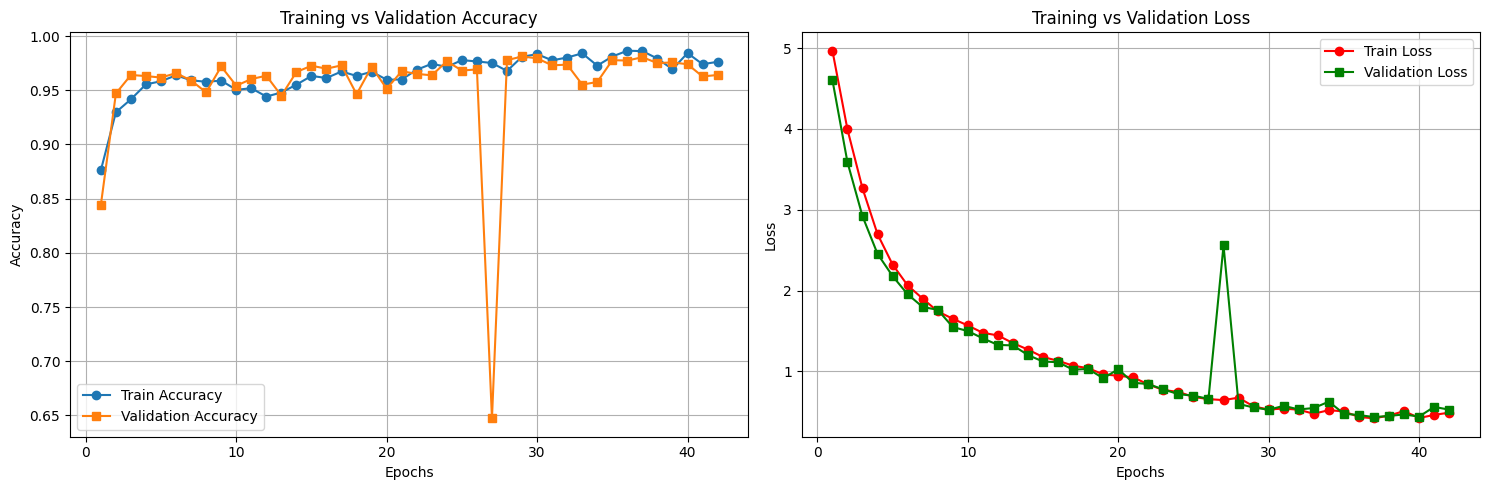

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

# # Accuracy Graph
# plt.figure(figsize=(10, 5))
# plt.plot(epochs, train_acc, label="Train Accuracy", marker='o')
# plt.plot(epochs, val_acc, label="Validation Accuracy", marker='s')
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.title("Training vs Validation Accuracy")
# plt.legend()
# plt.grid()
# plt.show()

# # Loss Graph
# plt.figure(figsize=(10, 5))
# plt.plot(epochs, train_loss, label="Train Loss", marker='o', color='red')
# plt.plot(epochs, val_loss, label="Validation Loss", marker='s', color='green')
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training vs Validation Loss")
# plt.legend()
# plt.grid()
# plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy Graph
axes[0].plot(epochs, train_acc, label="Train Accuracy", marker='o')
axes[0].plot(epochs, val_acc, label="Validation Accuracy", marker='s')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Training vs Validation Accuracy")
axes[0].legend()
axes[0].grid()

# Loss Graph
axes[1].plot(epochs, train_loss, label="Train Loss", marker='o', color='red')
axes[1].plot(epochs, val_loss, label="Validation Loss", marker='s', color='green')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].set_title("Training vs Validation Loss")
axes[1].legend()
axes[1].grid()

# Show both graphs
plt.tight_layout()
plt.show()

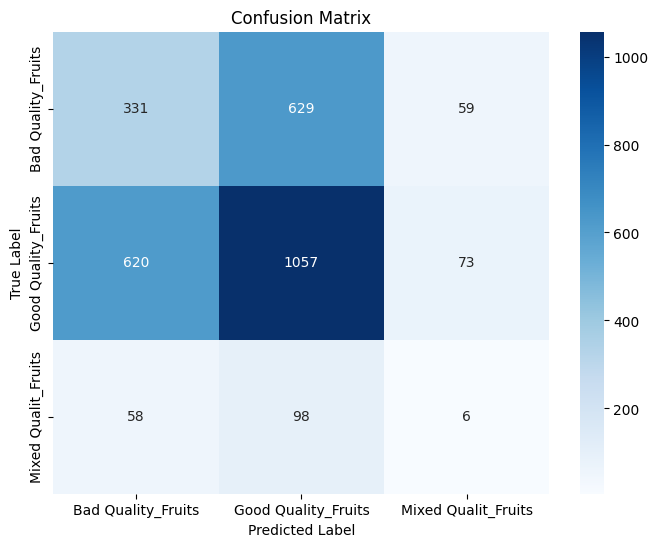

In [ ]:
y_true = test_generator.classes
y_pred = model.predict(test_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

Classification Report:
                      precision    recall  f1-score   support

 Bad Quality_Fruits       0.33      0.32      0.33      1019
Good Quality_Fruits       0.59      0.60      0.60      1750
Mixed Qualit_Fruits       0.04      0.04      0.04       162

           accuracy                           0.48      2931
          macro avg       0.32      0.32      0.32      2931
       weighted avg       0.47      0.48      0.47      2931

